In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading the image
filename = 'img2.png'
image = cv2.imread('Barnacles/' + filename)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)

This HSV conversion step comes in handy for images that are outside, as the standard BGR color space is more sensitive to variations in lighting conditions and shadows. Using HSV space should allow for more consistent color segmentation.

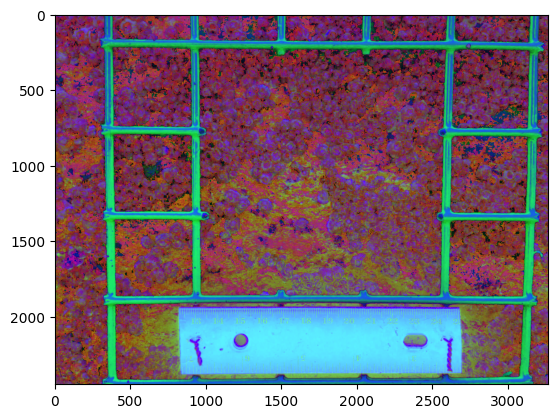

In [13]:
# converting to HSV color space for better color segmentation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

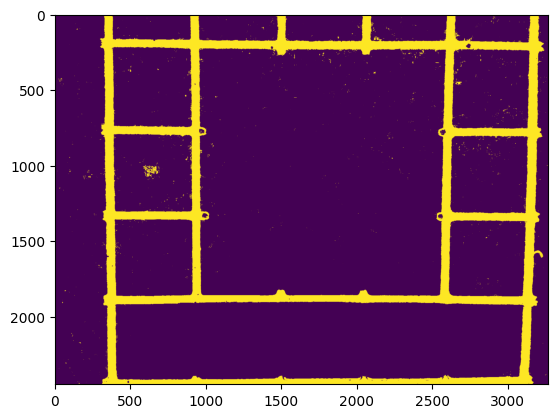

In [14]:
# defining range for green color in HSV
lower_green = np.array([10, 50, 0])
upper_green = np.array([35, 255, 255])

# creating a mask for the green frame
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask)

I run into my first major problem here---the green frame has multiple square areas that I can pick from. The most problematic is the large outside perimeter which makes it so I can't simply pick the largest contour. Luckily, cv2.findContours outputs a list of all contours. I can sort this list and pick the second-largest contour which should be the large inner square. Its important that I take into account the case where the inner square is the largest contour. In this case, I will simply take the largest contour as the area.

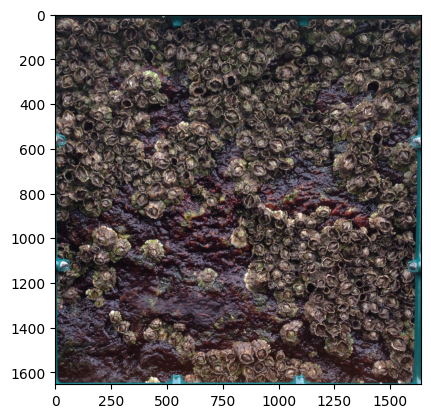

In [15]:
# defining the contours of the green frame
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sorting the contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Check to make sure there are at least 2 contours
if len(contours) < 2:
    print("No inner square found")
    # here you would return the only contour

# Assuming the region is the second-largest square
roi_contour = contours[1]
x, y, w, h = cv2.boundingRect(roi_contour)

# Crop the inner square
roi = image[y:y+h, x:x+w]
plt.imshow(roi)

In [16]:
# Save the ROI to a new file
roi_RGB = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
cv2.imwrite('barnacle_dataset/train/images/roi_' + filename, roi_RGB)

True

True

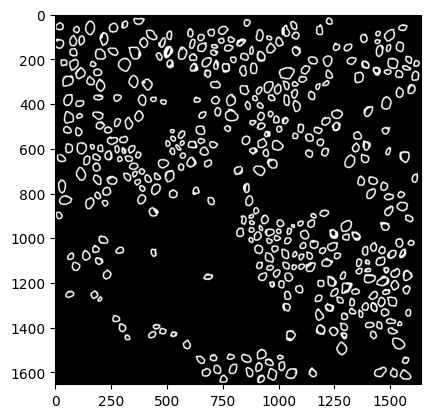

In [17]:
# doing the same thing to the masks
maskname = 'mask2.png'
mask = cv2.imread('Barnacles/' + maskname)

# cropping
mask_roi = mask[y:y+h, x:x+w]

# making it grayscale for training; inversion needed to make background black and annotations white
mask_roi_gray = cv2.cvtColor(mask_roi, cv2.COLOR_BGR2GRAY)
_, mask_roi_binary = cv2.threshold(mask_roi_gray, 254, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask_roi_binary, cmap = 'gray')

# saving to new file
cv2.imwrite('barnacle_dataset/train/masks/mask_roi_' + filename, mask_roi_binary)

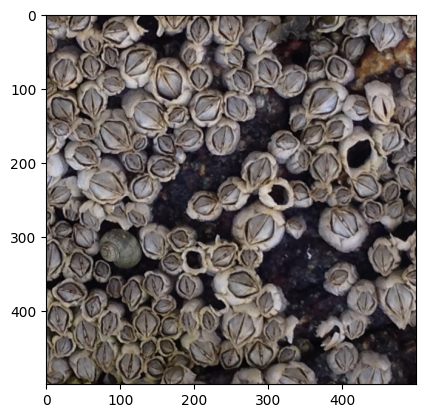

In [25]:
unseenname = "unseen_img2.png"
unseen = cv2.imread('Barnacles/' + unseenname)
unseen = cv2.cvtColor(unseen, cv2.COLOR_RGB2BGR)
plt.imshow(unseen)

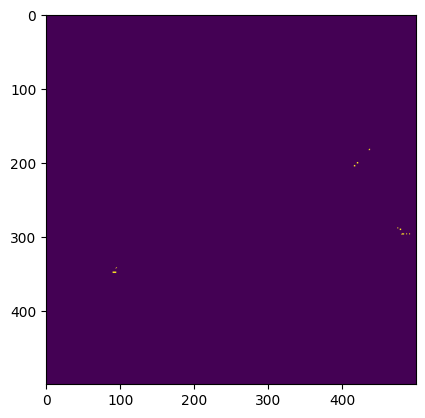

In [26]:
unseen_hsv = cv2.cvtColor(unseen, cv2.COLOR_BGR2HSV)

# defining range for green color in HSV
lower_green = np.array([10, 50, 0])
upper_green = np.array([35, 255, 255])

# creating a mask for the green frame
unseen_mask = cv2.inRange(unseen_hsv, lower_green, upper_green)
plt.imshow(unseen_mask)

True

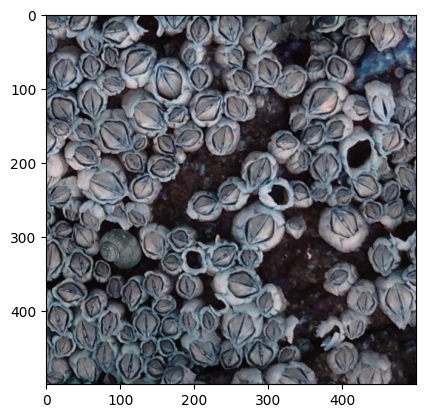

In [30]:
# defining the contours of the green frame
contours, _ = cv2.findContours(unseen_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Check to make sure there are at least 2 contours
if len(contours) == 0:
    roi_unseen = unseen

elif len(contours) < 2:
    # Take the only available contour
    roi_contour = contours[0]
    x, y, w, h = cv2.boundingRect(roi_contour)

else :
    # Sorting the contours by area
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    if cv2.contourArea(contours[0]) < 1000:
        roi_unseen = unseen

    else:
         # Assuming the region is the second-largest square
        roi_contour = contours[1]
        x, y, w, h = cv2.boundingRect(roi_contour)

        # Crop the inner square
        roi_unseen = unseen[y:y+h, x:x+w]

roi_unseen_RGB = cv2.cvtColor(roi_unseen, cv2.COLOR_BGR2RGB)
plt.imshow(roi_unseen_RGB)

# Save the ROI to a new file
cv2.imwrite('barnacle_dataset/test/roi_' + unseenname, roi_unseen_RGB)